In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('Equites_Historical_NonAdjusted_Prices.csv',usecols=['Industry Group', 'Symbol', 'Company Name', 'Date', 'Open', 'High',
       'Low', 'Close', 'Change', '% Change', 'Volume Traded',
       'Value Traded (SAR)', 'No. of Trades'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446113 entries, 0 to 446112
Data columns (total 13 columns):
Industry Group        446113 non-null object
Symbol                446113 non-null int64
Company Name          446113 non-null object
Date                  446113 non-null object
Open                  446113 non-null float64
High                  446113 non-null float64
Low                   446113 non-null float64
Close                 446113 non-null float64
Change                446113 non-null float64
% Change              446113 non-null float64
Volume Traded         446113 non-null int64
Value Traded (SAR)    446113 non-null float64
No. of Trades         446113 non-null int64
dtypes: float64(7), int64(3), object(3)
memory usage: 44.2+ MB


In [4]:
df['Company Name'].nunique()

205

In [5]:
df.Date = pd.to_datetime(df.Date, dayfirst=True)

In [6]:
df.sort_values('Date',inplace=True)

In [5]:
df['day'] = pd.DatetimeIndex(df['Date']).day

In [6]:
df['month'] = pd.DatetimeIndex(df['Date']).month

In [7]:
df['year'] = pd.DatetimeIndex(df['Date']).year

In [129]:
df.set_index('Date',inplace=True)

In [131]:
only_2019 = df[df['year']== 2019]

In [133]:
only_2019['Company Name'].nunique()

199

In [324]:
Riyad_Bank_2019 = only_2019[only_2019['Company Name'] == 'Riyad Bank']

In [7]:
Riyad_Bank = df[df['Company Name']== 'Riyad Bank']

In [326]:
import matplotlib.pyplot as plt

In [327]:
Riyad_Bank_2019

,Industry Group,Symbol,Company Name,Open,High,Low,Close,Change,% Change,Volume Traded,Value Traded (SAR),No. of Trades,day,month,year
Date,,,,,,,,,,,,,,,
2019-01-01,Banks,1010,Riyad Bank,19.80,19.82,19.70,19.76,-0.06,-0.30,195681,3864995.88,119,1,1,2019
2019-01-02,Banks,1010,Riyad Bank,19.70,19.76,19.50,19.64,-0.12,-0.61,446526,8764155.84,235,2,1,2019
2019-01-03,Banks,1010,Riyad Bank,19.52,19.58,19.44,19.54,-0.10,-0.51,734006,14331748.78,558,3,1,2019
2019-01-06,Banks,1010,Riyad Bank,19.52,19.76,19.46,19.48,-0.06,-0.31,398650,7797687.38,260,6,1,2019
2019-01-07,Banks,1010,Riyad Bank,19.48,19.52,19.38,19.44,-0.04,-0.21,1207770,23480349.30,539,7,1,2019
2019-01-08,Banks,1010,Riyad Bank,19.48,19.60,19.44,19.46,0.02,0.10,1084720,21147111.52,603,8,1,2019
2019-01-09,Banks,1010,Riyad Bank,19.60,19.70,19.46,19.46,0.00,0.00,1858014,36333567.28,747,9,1,2019
2019-01-10,Banks,1010,Riyad Bank,19.50,19.54,19.40,19.46,0.00,0.00,1726548,33605056.00,764,10,1,2019
2019-01-13,Banks,1010,Riyad Bank,19.46,19.60,19.36,19.52,0.06,0.31,2080054,40547164.98,527,13,1,2019


In [328]:
rolmeanopen2 = Riyad_Bank_2019['Open'].rolling(2).mean()
rolmeanopen4 = Riyad_Bank_2019['Open'].rolling(4).mean()
rolmeanopen5 = Riyad_Bank_2019['Open'].rolling(5).mean()
rolmeanclose2 = Riyad_Bank_2019['Close'].rolling(2).mean()
rolmeanclose4 = Riyad_Bank_2019['Close'].rolling(4).mean()
rolmeanclose10 = Riyad_Bank_2019['Close'].rolling(10).mean()
rolmeanhigh2 = Riyad_Bank_2019['High'].rolling(2).mean()
rolmeanhigh4 = Riyad_Bank_2019['High'].rolling(4).mean()
rolmeanhigh10 = Riyad_Bank_2019['High'].rolling(10).mean()
rolmeanlow2 = Riyad_Bank_2019['Low'].rolling(2).mean()
rolmeanlow4 = Riyad_Bank_2019['Low'].rolling(4).mean()
rolmeanlow10 = Riyad_Bank_2019['Low'].rolling(10).mean()

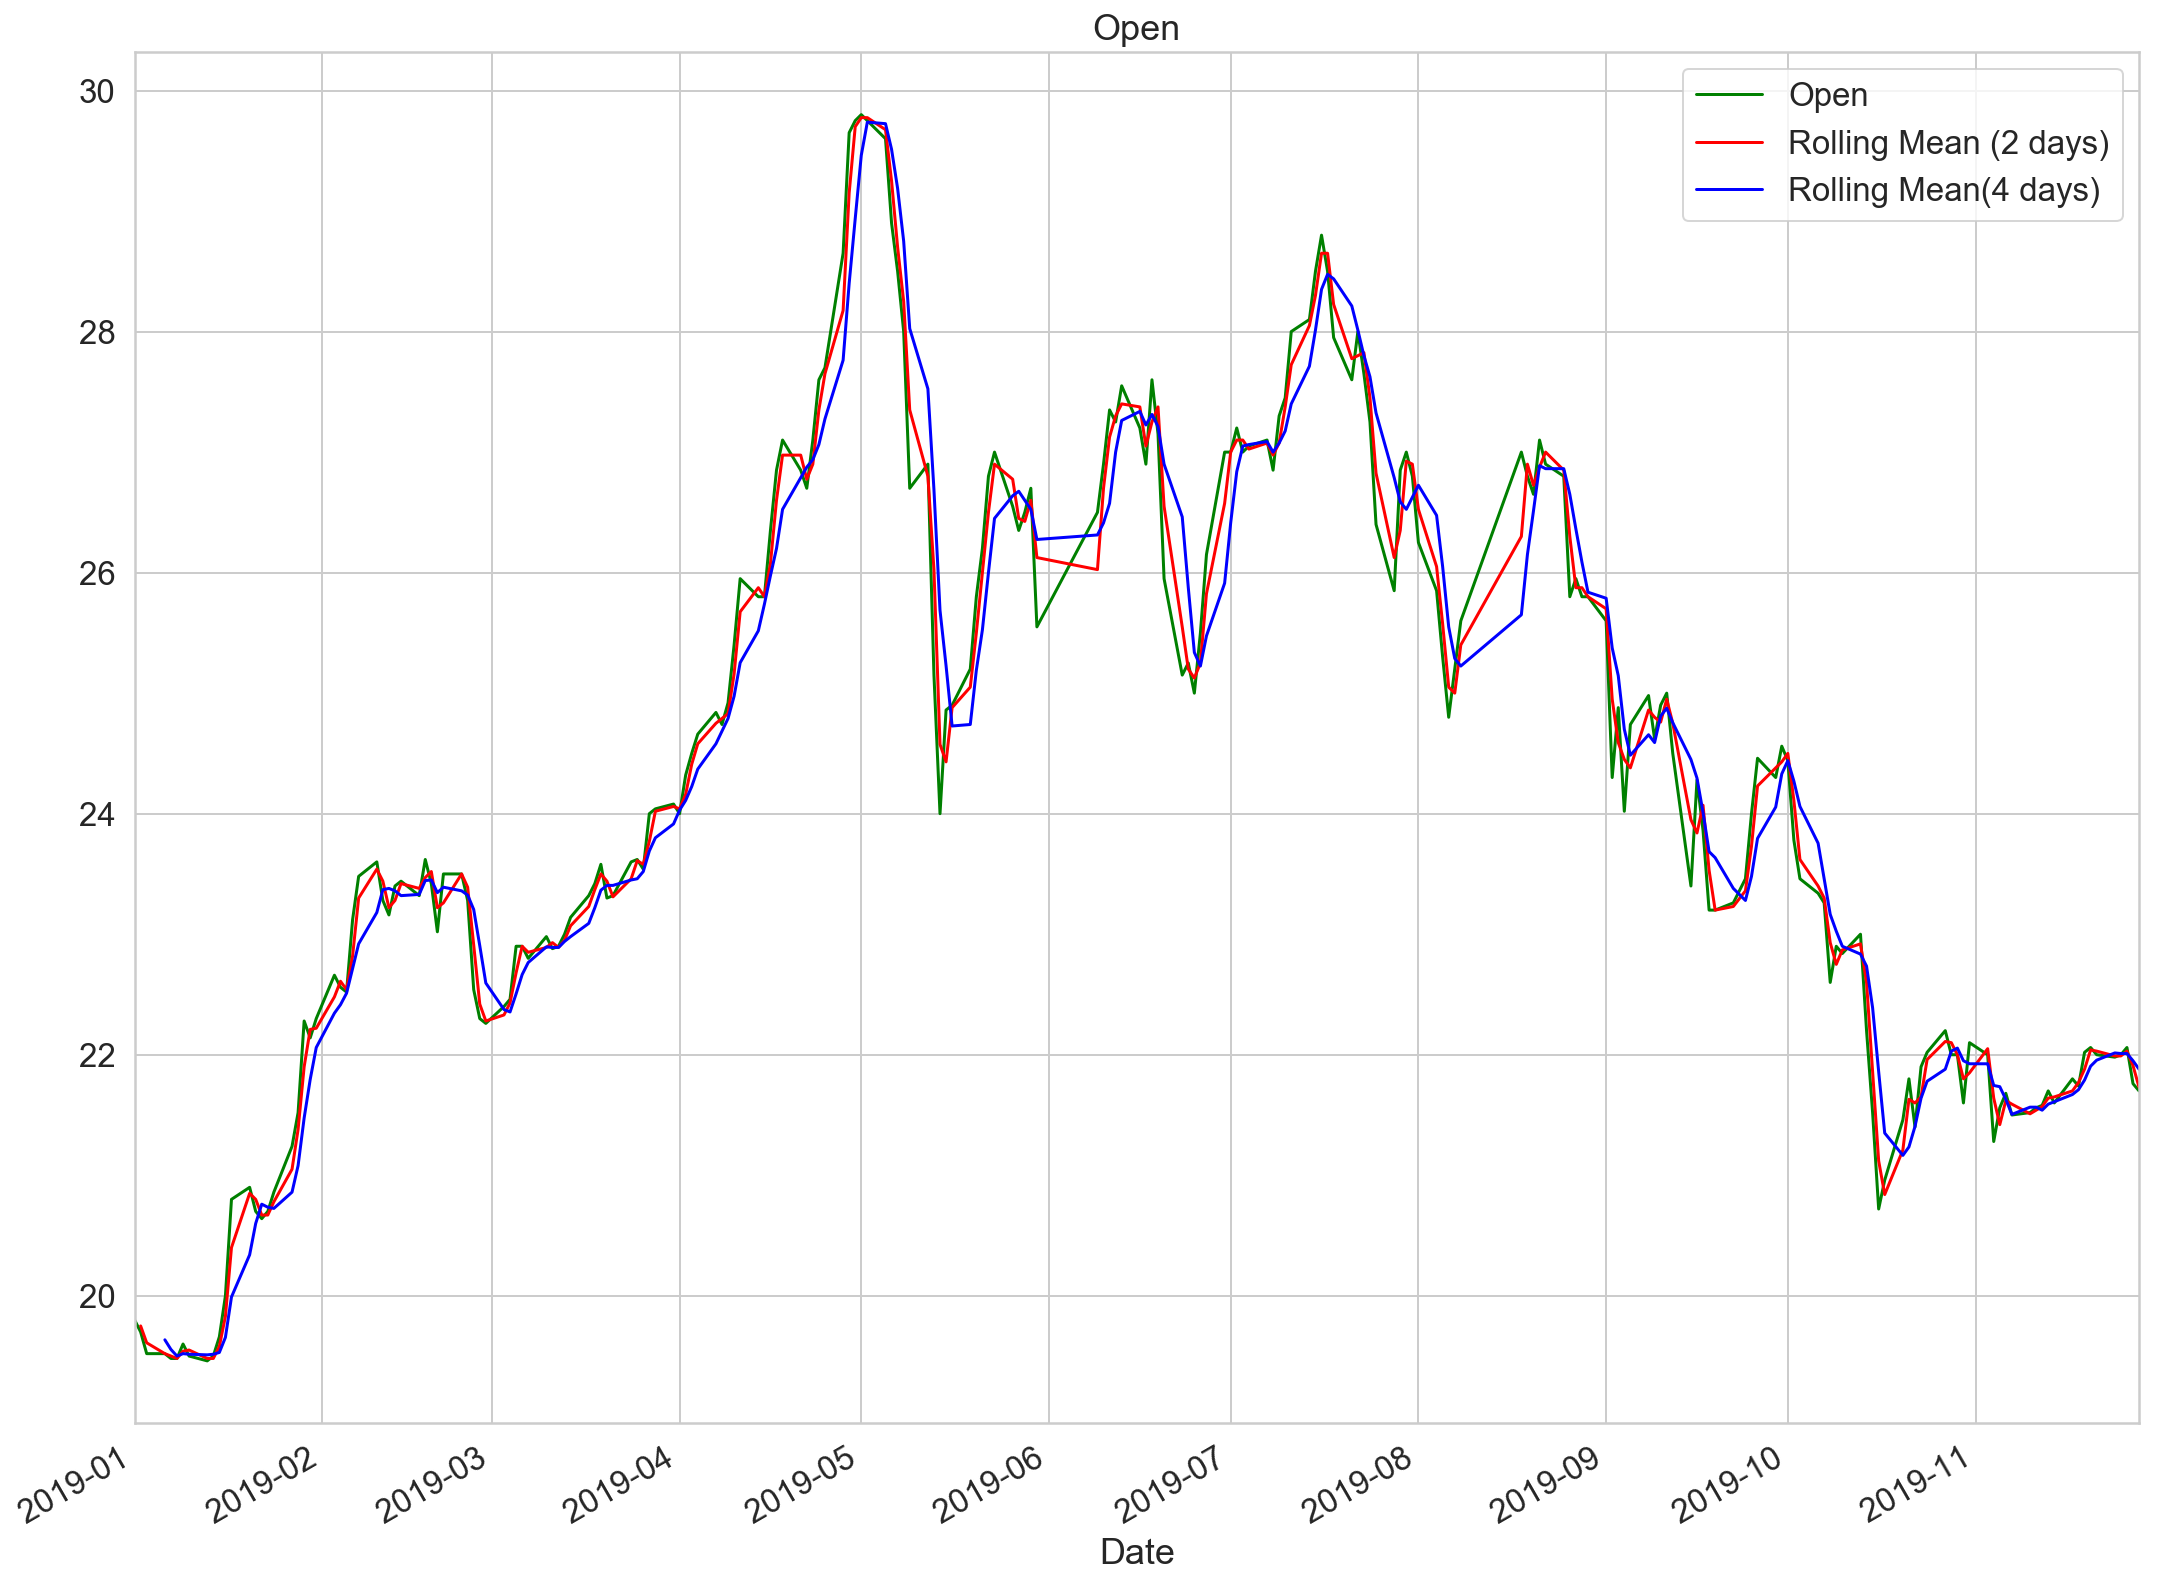

In [329]:
fig = plt.subplots( figsize=(16,14))
Riyad_Bank_2019['Open'].plot(title='Open', color='green')
plt.plot(rolmeanopen2, color='red', label='Rolling Mean (2 days)')
plt.plot(rolmeanopen4, color='blue', label='Rolling Mean(4 days)')

plt.legend(loc='best')

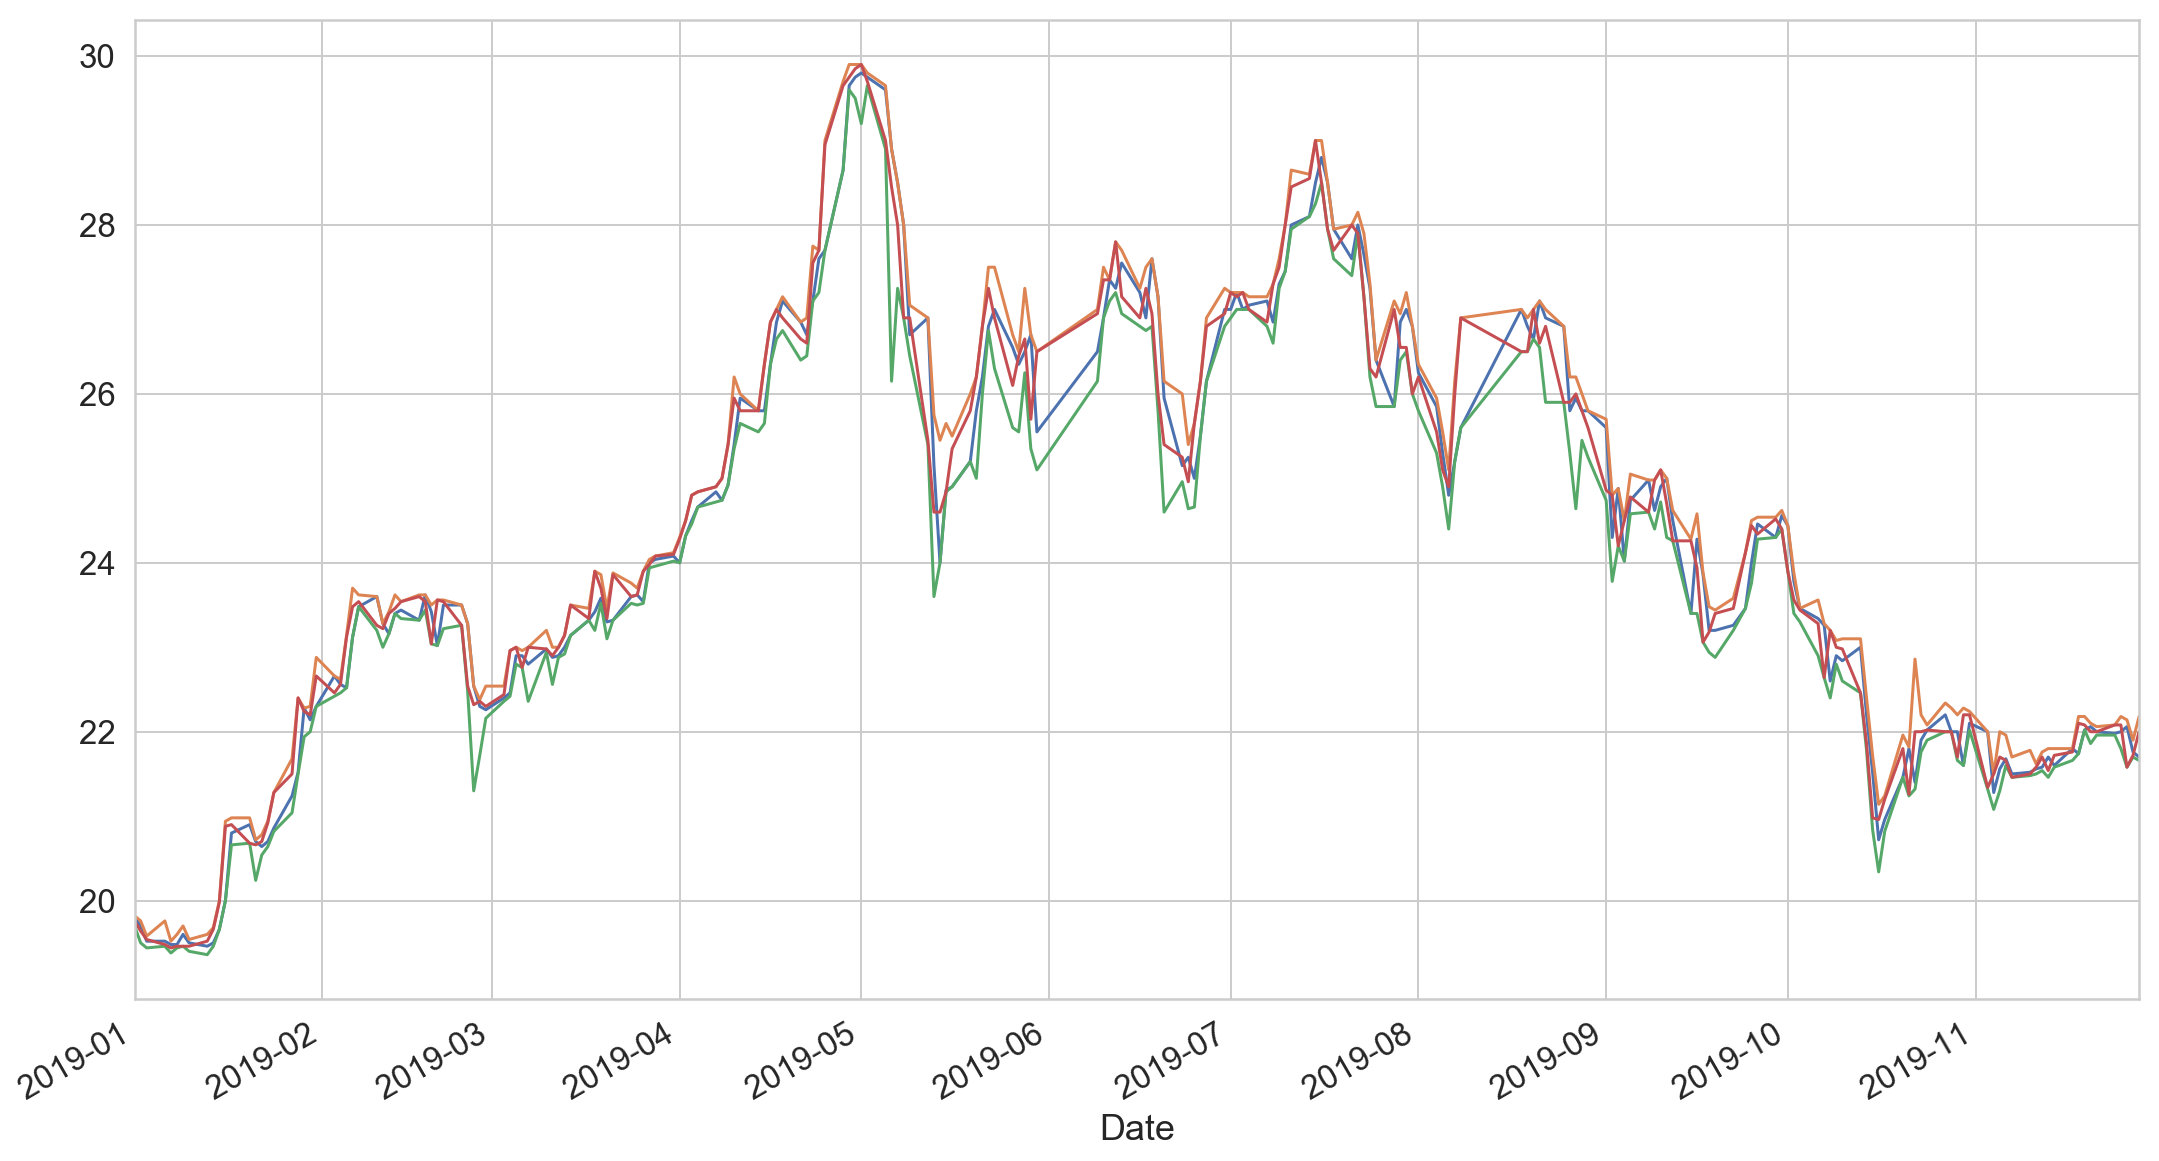

In [330]:
fig = plt.figure(figsize=(16,10))
Riyad_Bank_2019['Open'].plot()
Riyad_Bank_2019['High'].plot()
Riyad_Bank_2019['Low'].plot()
Riyad_Bank_2019['Close'].plot()

In [331]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [6]:
Riyad_Bank.columns

Index(['Industry Group', 'Symbol', 'Company Name', 'Date', 'Open', 'High',
       'Low', 'Close', 'Change', '% Change', 'Volume Traded',
       'Value Traded (SAR)', 'No. of Trades'],
      dtype='object')

In [410]:
Riyad_Bank['Company Name'].nunique()

1

In [8]:
Riyadhb_for_model = Riyad_Bank[['Date','Open', 'High', 'Low',
       'Close', 'Change', '% Change', 'Volume Traded','Value Traded (SAR)',
       'No. of Trades']]

In [9]:
Riyadhb_for_model.sort_values('Date',inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
Riyadhb_for_model

,Date,Open,High,Low,Close,Change,% Change,Volume Traded,Value Traded (SAR),No. of Trades
2121,2009-01-03,21.00,21.85,21.00,21.75,0.55,2.59,589847,12743884.20,517
2123,2009-01-04,21.70,21.70,21.30,21.65,-0.10,-0.45,417290,8990776.10,409
2133,2009-01-05,21.45,21.80,21.45,21.80,0.15,0.69,708922,15367084.75,526
2118,2009-01-06,21.60,21.85,21.55,21.80,0.00,0.00,528893,11486398.35,304
2129,2009-01-07,22.00,22.10,21.75,22.00,0.20,0.91,685541,15017064.55,404
2130,2009-01-10,21.75,21.75,21.35,21.50,-0.50,-2.27,239194,5143090.80,257
2132,2009-01-11,21.35,21.75,21.35,21.75,0.25,1.16,89022,1927517.40,131
2126,2009-01-12,21.60,21.65,21.35,21.40,-0.35,-1.60,359873,7712735.25,208
2128,2009-01-13,21.30,21.40,21.05,21.40,0.00,0.00,161723,3432513.65,195
2138,2009-01-14,21.10,21.20,20.95,21.10,-0.30,-1.40,150724,3172611.60,198


In [11]:
Riyadhb_for_model.reset_index(inplace=True)

In [12]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
from keras.models import Sequential



import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [11]:
Riyadhb_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2722 entries, 0 to 2721
Data columns (total 11 columns):
index                 2722 non-null int64
Date                  2722 non-null datetime64[ns]
Open                  2722 non-null float64
High                  2722 non-null float64
Low                   2722 non-null float64
Close                 2722 non-null float64
Change                2722 non-null float64
% Change              2722 non-null float64
Volume Traded         2722 non-null int64
Value Traded (SAR)    2722 non-null float64
No. of Trades         2722 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 234.0 KB


In [13]:
Riyadhb_for_model

,index,Date,Open,High,Low,Close,Change,% Change,Volume Traded,Value Traded (SAR),No. of Trades
0,2121,2009-01-03,21.00,21.85,21.00,21.75,0.55,2.59,589847,12743884.20,517
1,2123,2009-01-04,21.70,21.70,21.30,21.65,-0.10,-0.45,417290,8990776.10,409
2,2133,2009-01-05,21.45,21.80,21.45,21.80,0.15,0.69,708922,15367084.75,526
3,2118,2009-01-06,21.60,21.85,21.55,21.80,0.00,0.00,528893,11486398.35,304
4,2129,2009-01-07,22.00,22.10,21.75,22.00,0.20,0.91,685541,15017064.55,404
5,2130,2009-01-10,21.75,21.75,21.35,21.50,-0.50,-2.27,239194,5143090.80,257
6,2132,2009-01-11,21.35,21.75,21.35,21.75,0.25,1.16,89022,1927517.40,131
7,2126,2009-01-12,21.60,21.65,21.35,21.40,-0.35,-1.60,359873,7712735.25,208
8,2128,2009-01-13,21.30,21.40,21.05,21.40,0.00,0.00,161723,3432513.65,195
9,2138,2009-01-14,21.10,21.20,20.95,21.10,-0.30,-1.40,150724,3172611.60,198


In [14]:
window_len = 30

#Create a data point (i.e. a date) which splits the training and testing set
split_date = list(Riyadhb_for_model["Date"][-(2*window_len+1):])[0]

In [15]:
split_date

Timestamp('2019-09-04 00:00:00')

In [16]:
Riyadhb_for_model.columns

Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Change', '% Change',
       'Volume Traded', 'Value Traded (SAR)', 'No. of Trades'],
      dtype='object')

In [17]:
training_set, test_set = Riyadhb_for_model[Riyadhb_for_model['Date'] < split_date], Riyadhb_for_model[Riyadhb_for_model['Date'] >= split_date]
training_set = training_set.drop('index', 1)
test_set = test_set.drop('index', 1)

In [18]:

training_set.set_index('Date',inplace=True)

In [19]:
test_set.set_index('Date',inplace=True)

In [20]:
training_set.shape

(2661, 9)

In [21]:
training = training_set.as_matrix()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [22]:
training.shape

(2661, 9)

In [23]:
test_set[0:1]

,Open,High,Low,Close,Change,% Change,Volume Traded,Value Traded (SAR),No. of Trades
Date,,,,,,,,,
2019-09-04,24.02,24.5,24.02,24.5,0.3,1.24,2831990,68821750.58,1852


In [24]:
testing = test_set.as_matrix()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [25]:
testing.shape

(61, 9)

In [26]:
LSTM_training_inputs.shape

NameError: name 'LSTM_training_inputs' is not defined

In [27]:
LSTM_training_outputs.shape

NameError: name 'LSTM_training_outputs' is not defined

In [28]:
np.reshape(LSTM_training_outputs, (len(LSTM_training_outputs),1,1)).shape

NameError: name 'LSTM_training_outputs' is not defined

In [29]:
len(training_set)-window_len

2631

In [41]:

LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set['Open'][i:(i+window_len)].copy()
    
    LSTM_training_inputs.append(temp_set)
LSTM_training_outputs = training_set['Open'][window_len:].values
# LSTM_training_outputs = np.reshape(LSTM_training_outputs, (len(LSTM_training_outputs),1,1))


LSTM_training_inputs = np.array(LSTM_training_inputs)
LSTM_training_inputs = np.reshape(LSTM_training_inputs,(len(LSTM_training_inputs),window_len,1))

#Create windows for testing
LSTM_test_inputs = []
for i in range(len(testing)-window_len):
    temp_set1 = test_set['Open'][i:(i+window_len)].copy()
    
    
    LSTM_test_inputs.append(temp_set1)
LSTM_test_outputs = test_set['Open'][window_len:].values


LSTM_test_inputs = np.array(LSTM_test_inputs)
LSTM_test_inputs = np.reshape(LSTM_test_inputs,(len(LSTM_test_inputs),window_len,1))

In [197]:
LSTM_training_outputs.shape

(2631, 1, 1)

In [31]:
from sklearn import linear_model 
from sklearn.metrics import mean_absolute_error


In [32]:
# model = Sequential()

In [33]:
# def build_model(inputs, output_size, neurons, activ_func="linear",
#                 dropout=0.10, loss="mae", optimizer="adam"):
    
#     model = Sequential()

#     model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
#     model.add(Dropout(dropout))
#     model.add(Dense(units=output_size))
#     model.add(Activation(activ_func))

#     model.compile(loss=loss, optimizer=optimizer)
#     return model


In [34]:
def build_model(inputs, output_size, neurons, activ_func="relu",
                 dropout=0.10, loss="mae", optimizer="adam"):
    
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size,activation=activ_func))
#     model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model


In [35]:
LSTM_training_inputs.shape

(2631, 30, 1)

In [36]:
nn_model = build_model(LSTM_training_inputs, output_size=1, neurons = 250)
# model output is next price normalised to 10th previous closing price
# train model on data
# note: eth_history contains information on the training error per epoch
nn_history = nn_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=60, batch_size=3, verbose=1,validation_split= 0.2,)

Train on 2104 samples, validate on 527 samples
Epoch 1/60
2104/2104 [==============================] - 10s 5ms/step - loss: 1.9717 - val_loss: 0.4826
Epoch 2/60
2104/2104 [==============================] - 11s 5ms/step - loss: 0.4841 - val_loss: 0.3695
Epoch 3/60
2104/2104 [==============================] - 11s 5ms/step - loss: 0.3926 - val_loss: 0.6782
Epoch 4/60
2104/2104 [==============================] - 11s 5ms/step - loss: 0.3815 - val_loss: 0.2377
Epoch 5/60
2104/2104 [==============================] - 11s 5ms/step - loss: 0.3643 - val_loss: 0.2385
Epoch 6/60
2104/2104 [==============================] - 11s 5ms/step - loss: 0.3330 - val_loss: 0.2764
Epoch 7/60
2104/2104 [==============================] - 11s 5ms/step - loss: 0.3343 - val_loss: 0.2290
Epoch 8/60
2104/2104 [==============================] - 11s 5ms/step - loss: 0.3122 - val_loss: 0.8010
Epoch 9/60
2104/2104 [==============================] - 11s 5ms/step - loss: 0.3269 - val_loss: 0.2094
Epoch 10/60
2104/2104 [===

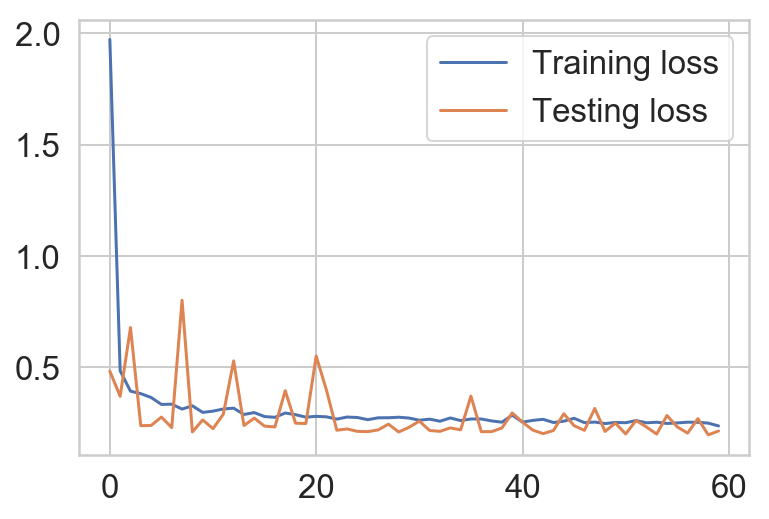

In [37]:
train_loss = nn_history.history['loss']
test_loss = nn_history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
plt.legend()

In [39]:
LSTM_test_outputs.shape

(31,)

In [40]:
LSTM_test_inputs.shape

(31, 30)

In [52]:
test_set.Open[0]

24.02

In [49]:
nn_model.predict(LSTM_test_inputs)[1]

array([20.95652], dtype=float32)

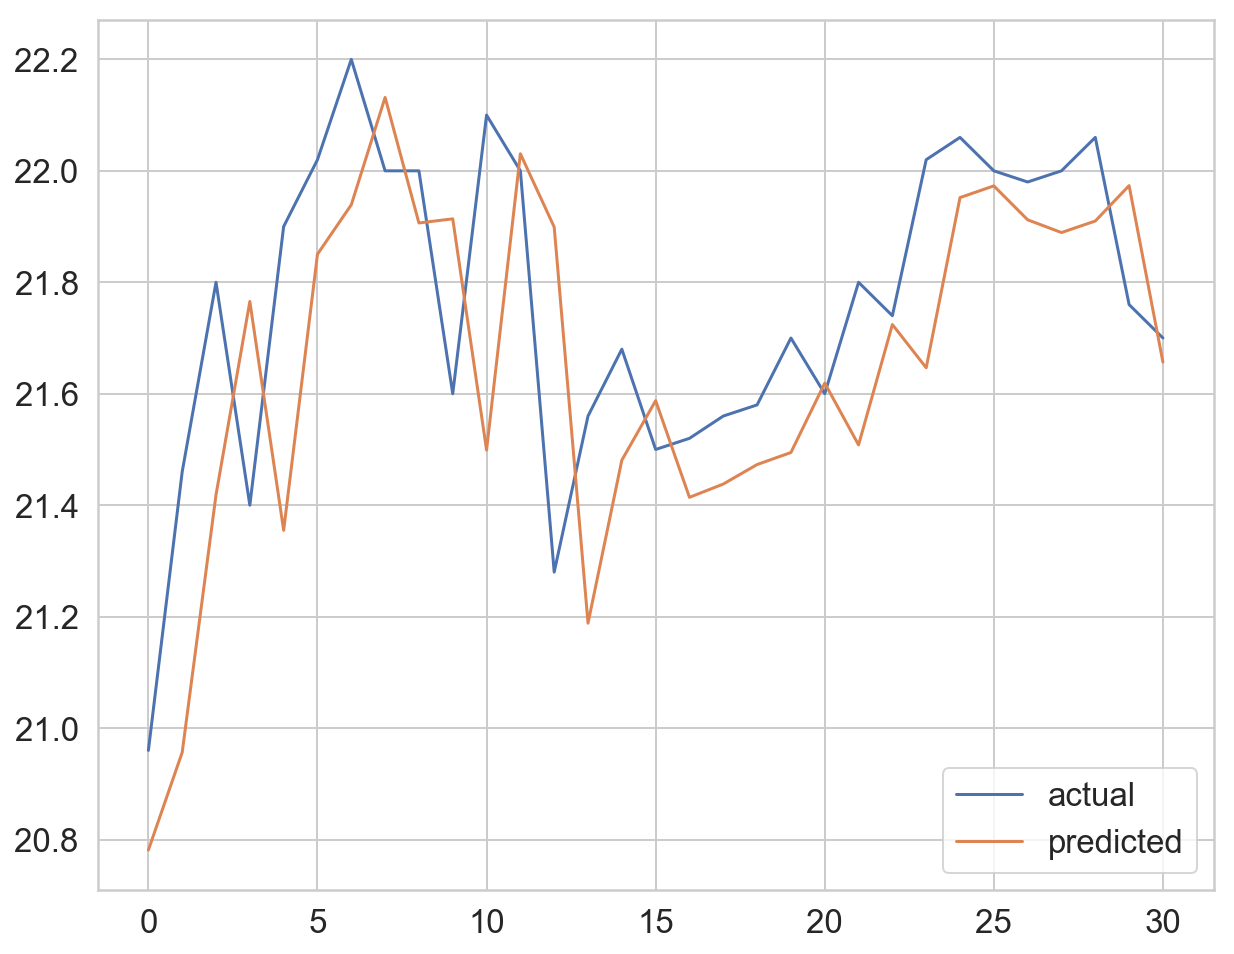

The Mean Absolute Error is: 0.2198163850845825


In [47]:
fig = plt.subplots( figsize=(10,8))
plt.plot(LSTM_test_outputs, label = "actual")
plt.plot(nn_model.predict(LSTM_test_inputs), label = "predicted")
plt.legend()
plt.show()
MAE = mean_absolute_error(LSTM_test_outputs, nn_model.predict(LSTM_test_inputs))
print('The Mean Absolute Error is: {}'.format(MAE))


In [1]:
fig = plt.subplots( figsize=(14,12))
plt.plot(LSTM_training_outputs, label = "actual")
plt.plot(nn_model.predict(LSTM_training_inputs), label = "predicted")
plt.legend()
plt.show()
MAE = mean_absolute_error(LSTM_training_outputs, nn_model.predict(LSTM_training_inputs))
print('The Mean Absolute Error is: {}'.format(MAE))


NameError: name 'plt' is not defined